In [187]:
import numpy as np
import pandas as pd

import os

from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

import warnings

import lightgbm

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from tqdm.notebook import tqdm

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use('seaborn-deep')
sns.set()


%matplotlib inline

%config InlineBackend.figure_format = 'retina'


import warnings
warnings.filterwarnings("ignore")

# Load Data and Analysis

In [32]:
os.listdir('datas')

['classifiers.csv',
 'diagnosticresultdetails.csv',
 'diagnosticresults.csv',
 'egeresultdetails.csv',
 'egeresults.csv',
 'medalistresults.csv',
 'medalistsubjects.csv',
 'participants.csv',
 'selfdiagnosticresultdetails.csv',
 'selfdiagnosticresults.csv',
 'subjects.csv']

In [201]:
# classifiers = pd.read_csv('datas/classifiers.csv')
diagnosticresultdetails = pd.read_csv('datas/diagnosticresultdetails.csv')
diagnosticresults = pd.read_csv('datas/diagnosticresults.csv')
egeresultdetails = pd.read_csv('datas/egeresultdetails.csv')
egeresults = pd.read_csv('datas/egeresults.csv')
medalistresults = pd.read_csv('datas/medalistresults.csv')
medalistsubjects = pd.read_csv('datas/medalistsubjects.csv')
participants = pd.read_csv('datas/participants.csv')
selfdiagnosticresultdetails = pd.read_csv('datas/selfdiagnosticresultdetails.csv')
selfdiagnosticresults = pd.read_csv('datas/selfdiagnosticresults.csv')
subjects = pd.read_csv('datas/subjects.csv')

In [36]:
datas = [
        diagnosticresultdetails,
        diagnosticresults,
        egeresultdetails,
        egeresults,
        medalistresults,
        medalistsubjects,
        participants,
        selfdiagnosticresultdetails,
        selfdiagnosticresults,
        subjects]

datas_name = [
        'diagnosticresultdetails',
        'diagnosticresults',
        'egeresultdetails',
        'egeresults',
        'medalistresults',
        'medalistsubjects',
        'participants',
        'selfdiagnosticresultdetails',
        'selfdiagnosticresults',
        'subjects']

In [47]:
for df, name in zip(datas, datas_name):
    print(f'name: {name}\nshape: {df.shape}\n{df.isnull().mean() * 100}')
    colours = ['#000099', '#ffff00'] 
#     sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
#     plt.show()
    print('##########################')
    print()

name: diagnosticresultdetails
shape: (50000, 8)
Id               0.000
ResultId         0.000
Source           0.000
NumberInKim      0.000
Mark             7.508
MaxMark          0.000
ClassifierId    13.592
Partition        0.000
dtype: float64
##########################

name: diagnosticresults
shape: (11360, 9)
ResultId           0.0
Source             0.0
ParticipantId      0.0
StudentParallel    0.0
TestDate           0.0
Mark               0.0
MaxMark            0.0
SubjectId          0.0
Partition          0.0
dtype: float64
##########################

name: egeresultdetails
shape: (11360, 9)
ResultId           0.0
Source             0.0
ParticipantId      0.0
StudentParallel    0.0
TestDate           0.0
Mark               0.0
MaxMark            0.0
SubjectId          0.0
Partition          0.0
dtype: float64
##########################

name: egeresults
shape: (38600, 6)
Id               0.0
ParticipantId    0.0
DateExam         0.0
MarkPercent      0.0
SubjectId        0.0
Pa

In [5]:
for i, j in zip(subjects['Name'], subjects['Id']):
    print(j, i)

1 Академический класс
2 Академический профиль
3 Алгебра
4 Английский язык
5 Английский язык (устный)
6 Английский язык старт
7 Астрономия
8 Безопасность дорожного движения
9 Биология
10 Веб-дизайн и разработка
11 Всеобщая история
12 География
13 Геометрия
14 Глобальные компетенции
15 Грамотность чтения
16 Графический дизайн
17 Демонстрационный вариант
18 Дефектология
19 Естественнонаучная грамотность
20 Естествознание
21 Заместитель по управлению ресурсами
22 Знакомство с МЭШ (Демоверсия)
23 Изобразительное искусство
24 ИКТ-компетентность
25 Инженерный класс
26 Инженерный профиль
27 Информатика и ИКТ
28 Информационная грамотность
29 Искусство (МХК)
30 Испанский язык
31 История
32 История России
33 История России 1 полугодие
34 Итальянский язык
35 ИТ-решения для бизнеса на платформе 1С: Предприятие 8""
36 Кадетский профиль
37 Китайский язык
38 Коммуникация на английском языке
39 Компетенции в сфере безопасности
40 Корпоративная защита от внутренних угроз информационной безопасности
41 К

## diagnosticresultdetails

In [7]:
diagnosticresultdetails.head(2)

,Id,ResultId,Source,NumberInKim,Mark,MaxMark,ClassifierId,Partition
0,3151177,187000,0,1,0.0,2.0,1883.0,1
1,3151178,187000,0,2,1.0,1.0,2579.0,1


In [56]:
(diagnosticresultdetails['Mark'] / diagnosticresultdetails['MaxMark']).mean()

0.6379851127407673

## diagnosticresults

In [9]:
diagnosticresults.head(2)

,ResultId,Source,ParticipantId,StudentParallel,TestDate,Mark,MaxMark,SubjectId,Partition
0,187000,0,C70E4C52-34C9-4FBE-9B52-4B78AE43C2DA,11,2019-11-08 16:52:48,25.0,33,75,1
1,239604,0,20647873-4AA8-42E3-B7FE-51DE8E0BEAF5,11,2020-03-20 15:04:34,12.0,30,77,1


In [57]:
(diagnosticresults['Mark'] / diagnosticresults['MaxMark']).mean()

0.44391132499566144

## egeresultdetails

In [58]:
egeresultdetails.head(2)

,ResultId,Source,ParticipantId,StudentParallel,TestDate,Mark,MaxMark,SubjectId,Partition
0,187000,0,C70E4C52-34C9-4FBE-9B52-4B78AE43C2DA,11,2019-11-08 16:52:48,25.0,33,75,1
1,239604,0,20647873-4AA8-42E3-B7FE-51DE8E0BEAF5,11,2020-03-20 15:04:34,12.0,30,77,1


In [59]:
(egeresultdetails['Mark'] / egeresultdetails['MaxMark']).mean()

0.44391132499566144

## egeresults

In [60]:
egeresults.head(2)

,Id,ParticipantId,DateExam,MarkPercent,SubjectId,Partition
0,000176B3-FD22-464F-80E4-1903332D8EFF,74A04FC2-A13B-468F-B4FF-08D4A3DDCEEA,2020-07-16,75,86,1
1,0007FBF5-CECE-4769-AAA4-F8D3B54460DE,4C5F3B22-6439-4255-83A3-9C2573607F96,2020-07-20,77,9,1


In [61]:
egeresults['MarkPercent'].mean()

64.65523316062176

<AxesSubplot:>

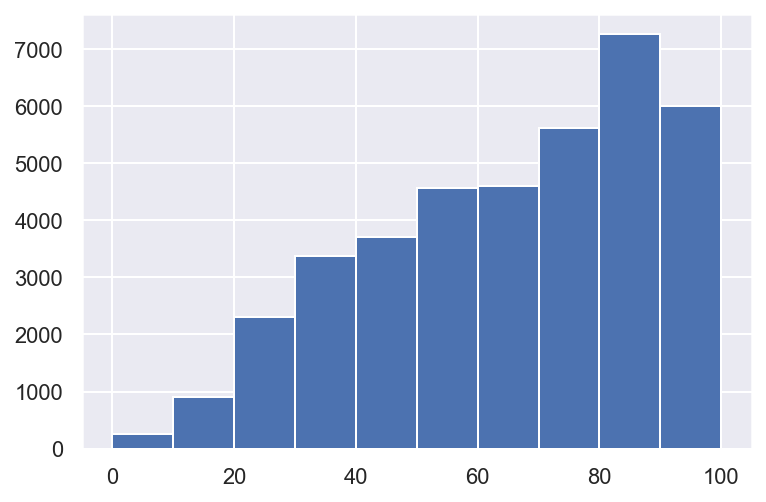

In [80]:
egeresults['MarkPercent'].hist()

<AxesSubplot:>

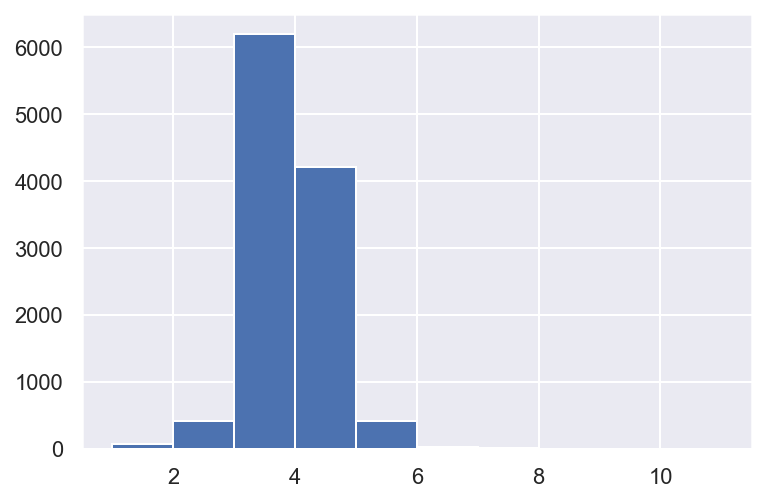

In [77]:
egeresults.groupby('ParticipantId').agg('Id').count().hist()

## medalistresults

In [12]:
medalistresults.head(2)

,Id,Type,ParticipantId,Partition
0,25,0,B693A6E8-E8C9-40F5-8E63-0083317462F5,1
1,27,0,EAC81C2C-E4C8-4213-A077-C013281F477A,1


<AxesSubplot:>

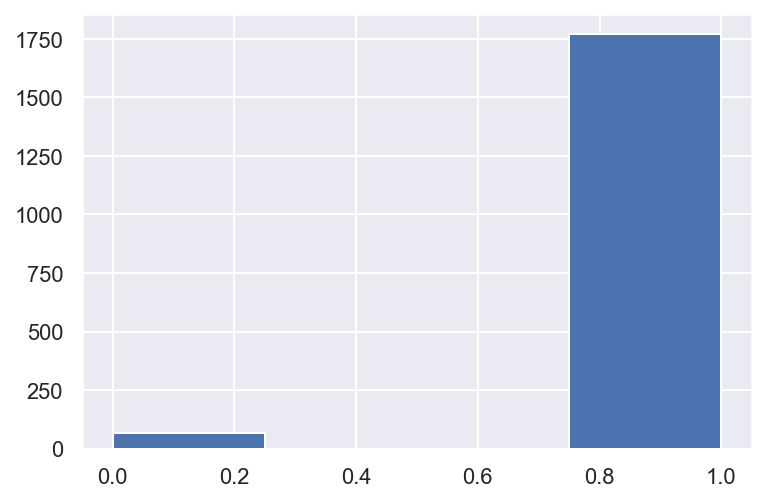

In [67]:
medalistresults['Type'].hist(bins=4)

## medalistsubjects

In [13]:
medalistsubjects.head(2)

,ResultId,Id,SubjectId,Partition
0,379,1,48,1
1,399,24,64,1


## selfdiagnosticresultdetails

In [70]:
selfdiagnosticresultdetails.head(2)

,Id,ResultId,NumberInKim,Mark,MaxMark,ClassifierId,Partition
0,36837244,2369230,1,NaN,1.0,5206.0,1
1,36837245,2369230,2,NaN,1.0,10170.0,1


In [69]:
(selfdiagnosticresultdetails['Mark'] / selfdiagnosticresultdetails['MaxMark']).mean()

0.799809874791518

## selfdiagnosticresults

In [49]:
selfdiagnosticresults.head(2)

,Id,ParticipantId,StudentParallel,TestDate,Mark,MaxMark,SubjectId,Partition
0,2369230,594F27DE-1479-476C-8CB6-A76EA1AB25C9,9,2019-09-01 00:03:20,0.0,10,27,1
1,2370235,C4285D8C-9B23-43C8-AECD-EC4271D48A59,10,2019-09-01 10:38:27,14.0,21,86,1


In [68]:
(selfdiagnosticresults['Mark'] / selfdiagnosticresults['MaxMark']).mean()

0.4241359919967646

# Preprocessing data

In [227]:
diagnosticresults_all = diagnosticresults.merge(diagnosticresultdetails, how='inner', on='ResultId')

In [228]:
diagnosticresults_all.head(1)

,ResultId,Source_x,ParticipantId,StudentParallel,TestDate,Mark_x,MaxMark_x,SubjectId,Partition_x,Id,Source_y,NumberInKim,Mark_y,MaxMark_y,ClassifierId,Partition_y
0,187000,0,C70E4C52-34C9-4FBE-9B52-4B78AE43C2DA,11,2019-11-08 16:52:48,25.0,33,75,1,3151177,0,1,0.0,2.0,1883.0,1


In [229]:
diagnosticresults_all = diagnosticresults_all.drop(['ResultId', 'Source_x', 'TestDate', 'Partition_x', 'Id', 'Source_y', 'NumberInKim', 'ClassifierId', 'Partition_y'], axis=1)

In [230]:
diagnosticresults.head()

,ResultId,Source,ParticipantId,StudentParallel,TestDate,Mark,MaxMark,SubjectId,Partition
0,187000,0,C70E4C52-34C9-4FBE-9B52-4B78AE43C2DA,11,2019-11-08 16:52:48,25.0,33,75,1
1,239604,0,20647873-4AA8-42E3-B7FE-51DE8E0BEAF5,11,2020-03-20 15:04:34,12.0,30,77,1
2,239606,0,4DFEFA69-EB35-44BD-B239-6AA4DE66F866,11,2020-03-20 15:06:20,24.0,31,86,1
3,239611,0,B4816FC2-CAF4-47EE-8AC7-73E32767E771,11,2020-03-20 15:16:21,27.0,31,86,1
4,239636,0,DFCBA91A-0BE5-4EB9-899E-D0166882F392,11,2020-03-23 10:01:31,26.0,31,9,1


In [231]:
diagnosticresults.shape, diagnosticresultdetails.shape, diagnosticresults_all.shape

((11360, 9), (50000, 8), (50000, 7))

In [247]:
selfdiagnosticresult_all = selfdiagnosticresults.merge(selfdiagnosticresultdetails, how='inner', left_on='Id', right_on='ResultId')

In [248]:
selfdiagnosticresult_all.head(1)

,Id_x,ParticipantId,StudentParallel,TestDate,Mark_x,MaxMark_x,SubjectId,Partition_x,Id_y,ResultId,NumberInKim,Mark_y,MaxMark_y,ClassifierId,Partition_y
0,2369230,594F27DE-1479-476C-8CB6-A76EA1AB25C9,9,2019-09-01 00:03:20,0.0,10,27,1,36837244,2369230,1,NaN,1.0,5206.0,1


In [249]:
selfdiagnosticresult_all = selfdiagnosticresult_all.drop(['TestDate', 'Id_x', 'Partition_x', 'ResultId', 'Id_y', 'NumberInKim', 'ClassifierId', 'Partition_y'], axis=1)

In [250]:
selfdiagnosticresult_all.head(1)

,ParticipantId,StudentParallel,Mark_x,MaxMark_x,SubjectId,Mark_y,MaxMark_y
0,594F27DE-1479-476C-8CB6-A76EA1AB25C9,9,0.0,10,27,NaN,1.0


In [255]:
selfdiagnosticresult_all['Mark_x'] = selfdiagnosticresult_all['Mark_x'].fillna(selfdiagnosticresult_all['Mark_x'].mean())
selfdiagnosticresult_all['Mark_y'] = selfdiagnosticresult_all['Mark_y'].fillna(selfdiagnosticresult_all['Mark_y'].mean())

In [256]:
selfdiagnosticresult_all.isnull().mean()

ParticipantId      0.0
StudentParallel    0.0
Mark_x             0.0
MaxMark_x          0.0
SubjectId          0.0
Mark_y             0.0
MaxMark_y          0.0
dtype: float64

In [257]:
selfdiagnosticresults.shape, selfdiagnosticresultdetails.shape, selfdiagnosticresult_all.shape

((21438, 8), (529358, 7), (529358, 7))

In [258]:
selfdiagnosticresult_all = selfdiagnosticresult_all.rename(columns={'Mark_x': 'Marks_x', 'MaxMark_x': 'MaxMarks_x'})

In [259]:
diagnosticresults_all['pr_x'] = diagnosticresults_all['Mark_x'] / diagnosticresults_all['MaxMark_x']
diagnosticresults_all['pr_y'] = diagnosticresults_all['Mark_y'] / diagnosticresults_all['MaxMark_y']
selfdiagnosticresult_all['pr_z'] = selfdiagnosticresult_all['Marks_x'] / selfdiagnosticresult_all['MaxMarks_x']

In [263]:
egeresult = egeresults.drop(['Id', 'DateExam', 'Partition'], axis=1)\
            .merge(medalistresults.drop(['Id', 'Partition'], axis=1), how='left', on='ParticipantId')

egeresult['Type'] = egeresult['Type'].fillna(-1)
egeresult = egeresult.merge(diagnosticresults_all, how='left', on='ParticipantId')
egeresult = egeresult.merge(selfdiagnosticresult_all.drop(['Mark_y', 'MaxMark_y'], axis=1), how='left', on='ParticipantId')

In [264]:
egeresults.shape, egeresult.shape

((38600, 6), (8683419, 17))

In [265]:
egeresult.head(2)

,ParticipantId,MarkPercent,SubjectId_x,Type,StudentParallel_x,Mark_x,MaxMark_x,SubjectId_y,Mark_y,MaxMark_y,pr_x,pr_y,StudentParallel_y,Marks_x,MaxMarks_x,SubjectId,pr_z
0,74A04FC2-A13B-468F-B4FF-08D4A3DDCEEA,75,86,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4C5F3B22-6439-4255-83A3-9C2573607F96,77,9,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
egeresult.isnull().mean()

ParticipantId        0.000000
MarkPercent          0.000000
SubjectId_x          0.000000
Type                 0.000000
StudentParallel_x    0.188683
Mark_x               0.188683
MaxMark_x            0.188683
SubjectId_y          0.188683
Mark_y               0.251283
MaxMark_y            0.188683
pr_x                 0.188683
pr_y                 0.251283
StudentParallel_y    0.019187
Marks_x              0.019187
MaxMarks_x           0.019187
SubjectId            0.019187
pr_z                 0.019187
dtype: float64

In [269]:
egeresult = egeresult.fillna(0)

In [270]:
egeresult.head(2)

,ParticipantId,MarkPercent,SubjectId_x,Type,StudentParallel_x,Mark_x,MaxMark_x,SubjectId_y,Mark_y,MaxMark_y,pr_x,pr_y,StudentParallel_y,Marks_x,MaxMarks_x,SubjectId,pr_z
0,74A04FC2-A13B-468F-B4FF-08D4A3DDCEEA,75,86,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4C5F3B22-6439-4255-83A3-9C2573607F96,77,9,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
egeresult.columns

Index(['ParticipantId', 'MarkPercent', 'SubjectId', 'Type'], dtype='object')

In [726]:
egeresult['tr'] = egeresult['SubjectId_x'] == egeresult['SubjectId_y']

In [272]:
X = egeresult[[
    'SubjectId_x',
    'Type',
    'pr_x',
    'pr_y',
    'pr_z',
    'SubjectId'
    
]]
y = egeresult['MarkPercent']

# X = egeresult.drop(['ParticipantId', 'MarkPercent'], axis=1)
# y = egeresult['MarkPercent']

<AxesSubplot:>

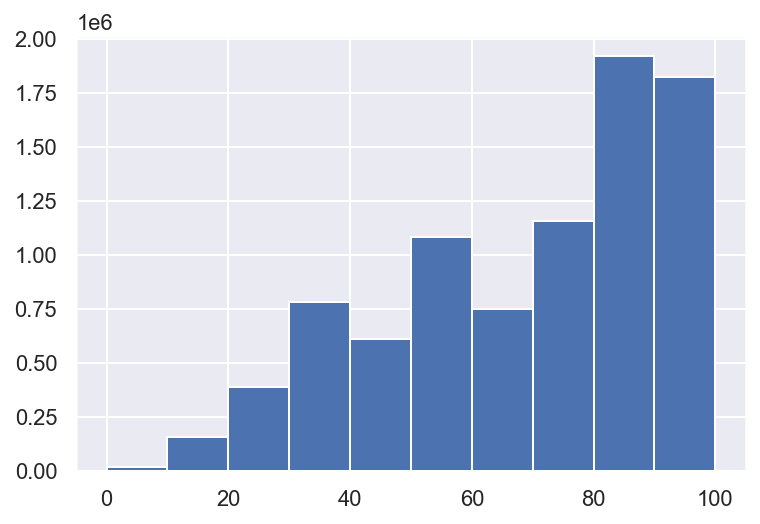

In [273]:
egeresult['MarkPercent'].hist()

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [276]:
lgbm = LGBMRegressor().fit(X_train, y_train)

In [277]:
mean_squared_error(y_test, lgbm.predict(X_test), squared=False)

10.150600375086588

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

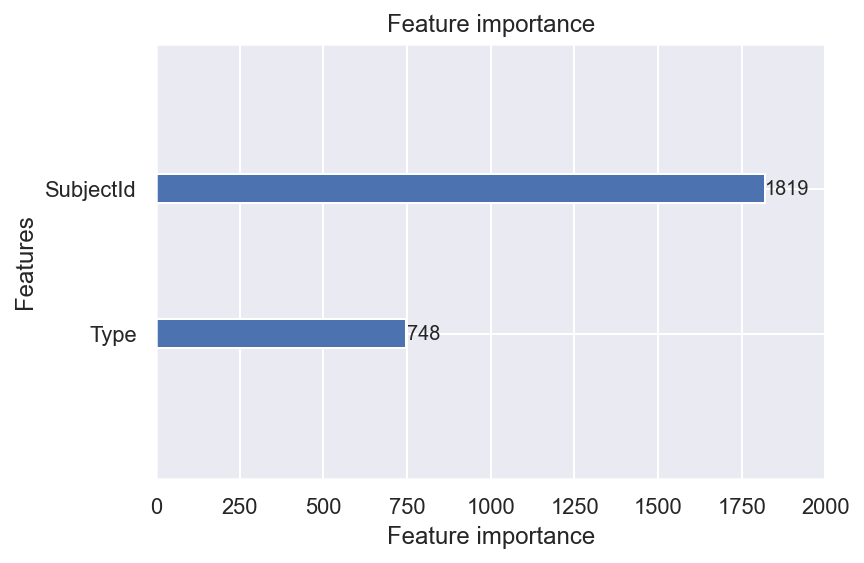

In [194]:
lightgbm.plot_importance(lgbm)

In [293]:


kf = KFold(n_splits=5)

rmse = []

X = X.to_numpy()
y = y.to_numpy().reshape(-1, 1)

for train_index, test_index in kf.split(X):
    lgbm = LGBMRegressor().fit(X[train_index], y[train_index])
    pred = lgbm.predict(X[test_index])
    
    m = mean_squared_error(y[test_index], pred, squared=False)
    rmse.append(m)
    
print(np.mean(rmse))

15.218138950552907


In [196]:
rmse

[17.46164954495491,
 17.648867058355034,
 17.12577376434365,
 17.22678841805763,
 17.55691679874758]

In [197]:
X.shape

(38735, 2)

## NN

In [683]:
X = egeresult[['SubjectId_x', 'Type', 'Mark_y', 'MaxMark_y', 'StudentParallel', 'pr', 'Mark_x', 'MaxMark_x']]
y = egeresult['MarkPercent']

x_loader = DataLoader(X.to_numpy(), batch_size=500)
y_loader = DataLoader(y.to_numpy().reshape(-1, 1), batch_size=500)

In [684]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        
#         self.lstm1 = nn.LSTMCell(9, 9)
#         self.batch_norm1 = nn.BatchNorm1d(7)
        
        self.fc1_1 = nn.Linear(8, 300)
        self.fc1_2 = nn.Linear(300, 100)
        self.fc1_3 = nn.Linear(100, 1)
        
#         self.batch_norm2 = nn.BatchNorm1d(17)

#         self.fc2_1 = nn.Linear(17, 100)
#         self.fc2_2 = nn.Linear(100, 200)
#         self.fc2_3 = nn.Linear(200, 20)
        
#         self.batch_norm3 = nn.BatchNorm1d(27)
        
#         self.fc3_1 = nn.Linear(27, 100)
#         self.fc3_2 = nn.Linear(100, 200)
#         self.fc3_3 = nn.Linear(200, 20)
        
#         self.out2_1 = nn.Linear(20, 1)


        self.dropout = nn.Dropout(p=0.2)
    def forward(self, x):
        
#         x = self.batch_norm1(x)
        
        x1 = x
    
        
        x = F.relu(self.fc1_1(x))
        x = self.dropout(F.relu(self.fc1_2(x))) 
        x = self.dropout(F.relu(self.fc1_3(x)))
        
# #         x = self.out1_1(x)

#         x = torch.cat((x, x1), dim=1)
            
# #         x = self.batch_norm2(x)
        
#         x = F.relu(self.fc2_1(x))
#         x = self.dropout(F.relu(self.fc2_2(x))) 
#         x = self.dropout(F.relu(self.fc2_3(x)))
        
#         x = torch.cat((x, x1), dim=1)
        
# #         x = self.batch_norm3(x)
        
#         x = F.relu(self.fc3_1(x))
#         x = self.dropout(F.relu(self.fc3_2(x))) 
#         x = self.dropout(F.relu(self.fc3_3(x)))
        
#         x = self.out2_1(x)
        
        return x

In [685]:
model = NN()

In [686]:
for i, j in zip(x_loader, y_loader):
    break

In [687]:
# model.forward(i.float())

In [688]:
losses = []
accuracy = []
r2_sc = []

In [689]:
epochs = 5
learning_rate = 1e-3

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.MSELoss()

In [690]:

loss_step = 50

for epoch in tqdm(range(epochs)):

    running_loss = 0.0
    for step, (x, y) in enumerate(zip(x_loader, y_loader)):


        
        optimizer.zero_grad()

        pred = model.forward(x.float())
#         print(pred)
        loss = loss_fn(pred, y.float())

        loss.backward()

        optimizer.step()

        running_loss += loss

        if (step + 1) % loss_step == 0 :
            average_loss = running_loss / loss_step

            print('epoch: {0}, step: {1}, loss: {2}'.format(epoch + 1, step + 1, average_loss))

            losses.append(average_loss)
            running_loss = 0.0 

with torch.no_grad():
    plt.plot(np.arange(len(losses)), losses)
    plt.show()

print('Обучение законченно!!!')

# PATH = 'model_CNN_1.1'
# torch.save(model.state_dict(), PATH)

# print('Модель сохранена')

epoch: 1, step: 50, loss: 1952.4854736328125
epoch: 1, step: 100, loss: 1523.66845703125
epoch: 1, step: 150, loss: 1427.1075439453125
epoch: 1, step: 200, loss: 1337.5267333984375
epoch: 1, step: 250, loss: 1386.139404296875
epoch: 1, step: 300, loss: 1371.727783203125
epoch: 1, step: 350, loss: 1335.737060546875
epoch: 1, step: 400, loss: 1348.7962646484375
epoch: 2, step: 50, loss: 1401.9425048828125
epoch: 2, step: 100, loss: 1393.7952880859375
epoch: 2, step: 150, loss: 1337.31982421875
epoch: 2, step: 200, loss: 1330.1717529296875
epoch: 2, step: 250, loss: 1348.54638671875
epoch: 2, step: 300, loss: 1341.5784912109375
epoch: 2, step: 350, loss: 1360.8511962890625
epoch: 2, step: 400, loss: 1339.6170654296875
epoch: 3, step: 50, loss: 1350.7236328125
epoch: 3, step: 100, loss: 1344.76025390625
epoch: 3, step: 150, loss: 1353.857177734375



KeyboardInterrupt: 

# Data Test Load and Predict

In [280]:
diagnosticresultdetails_test = pd.read_csv('data_test/diagnosticresultdetails.csv')
diagnosticresults_test = pd.read_csv('data_test/diagnosticresults.csv')
egeresultdetails_test = pd.read_csv('data_test/egeresultdetails.csv')
egeresults_test = pd.read_csv('data_test/egeresults.csv')
medalistresults_test = pd.read_csv('data_test/medalistresults.csv')
medalistsubjects_test= pd.read_csv('data_test/medalistsubjects.csv')
participants_test = pd.read_csv('data_test/participants.csv')
selfdiagnosticresultdetails_test = pd.read_csv('data_test/selfdiagnosticresultdetails.csv')
selfdiagnosticresults_test = pd.read_csv('data_test/selfdiagnosticresults.csv')
# subjects = pd.read_csv('data_test/subjects.csv')

In [303]:
diagnosticresults_all_test = diagnosticresults_test.merge(diagnosticresultdetails_test, how='inner', on='ResultId')

In [304]:
diagnosticresults_all_test = diagnosticresults_all_test.drop(['ResultId', 'Source_x', 'TestDate', 'Partition_x', 'Id', 'Source_y', 'NumberInKim', 'ClassifierId', 'Partition_y'], axis=1)

In [305]:
selfdiagnosticresult_all_test = selfdiagnosticresults_test.merge(selfdiagnosticresultdetails_test, how='inner', left_on='Id', right_on='ResultId')

In [306]:
selfdiagnosticresult_all_test = selfdiagnosticresult_all_test.drop(['TestDate', 'Id_x', 'Partition_x', 'ResultId', 'Id_y', 'NumberInKim', 'ClassifierId', 'Partition_y'], axis=1)

In [307]:
selfdiagnosticresult_all_test['Mark_x'] = selfdiagnosticresult_all_test['Mark_x'].fillna(selfdiagnosticresult_all_test['Mark_x'].mean())
selfdiagnosticresult_all_test['Mark_y'] = selfdiagnosticresult_all_test['Mark_y'].fillna(selfdiagnosticresult_all_test['Mark_y'].mean())

In [308]:
selfdiagnosticresult_all_test = selfdiagnosticresult_all_test.rename(columns={'Mark_x': 'Marks_x', 'MaxMark_x': 'MaxMarks_x'})

In [309]:
diagnosticresults_all_test['pr_x'] = diagnosticresults_all_test['Mark_x'] / diagnosticresults_all_test['MaxMark_x']
diagnosticresults_all_test['pr_y'] = diagnosticresults_all_test['Mark_y'] / diagnosticresults_all_test['MaxMark_y']
selfdiagnosticresult_all_test['pr_z'] = selfdiagnosticresult_all_test['Marks_x'] / selfdiagnosticresult_all_test['MaxMarks_x']

In [310]:
egeresult_test = egeresults_test.drop(['Id', 'DateExam', 'Partition'], axis=1)\
            .merge(medalistresults_test.drop(['Id', 'Partition'], axis=1), how='left', on='ParticipantId')

egeresult_test['Type'] = egeresult_test['Type'].fillna(-1)
egeresult_test = egeresult_test.merge(diagnosticresults_all_test, how='left', on='ParticipantId')
egeresult_test = egeresult_test.merge(selfdiagnosticresult_all_test.drop(['Mark_y', 'MaxMark_y'], axis=1), how='left', on='ParticipantId')

In [311]:
# egeresult_test = egeresults_test.drop(['Id', 'DateExam', 'Partition'], axis=1)\
#             .merge(medalistresults_test.drop(['Id', 'Partition'], axis=1), how='left', on='ParticipantId')

# egeresult_test['Type'] = egeresult_test['Type'].fillna(-1)

In [312]:
Xt = egeresult_test[[
    'SubjectId_x',
    'Type',
    'pr_x',
    'pr_y',
    'pr_z',
    'SubjectId'
    
]]
yt = egeresult_test['MarkPercent']


# Xt = egeresult_test.drop(['ParticipantId', 'MarkPercent'], axis=1)
# yt = egeresult_test['MarkPercent']

### Final Result

In [313]:
mean_squared_error(yt, lgbm.predict(Xt), squared=False)

13.803962676819637

In [314]:
pred_test = lgbm.predict(Xt)

In [324]:
sub = pd.DataFrame()

sub['ParticipantId'] = egeresult_test['ParticipantId']
sub['SubjectId'] = egeresult_test['SubjectId']

# немного не успел сформировать submit